Day 25:: Normalization ::

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('wine_data.csv',header = None ,usecols = [0,1,2])
df.columns = ['class label','Alcohol','Malic acid']
df.head()

,class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [3]:
# kde plot
#sns.kdeplotlot(df['Alcohol'])
#sns.kdeplot(df['Malic acid'])

<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

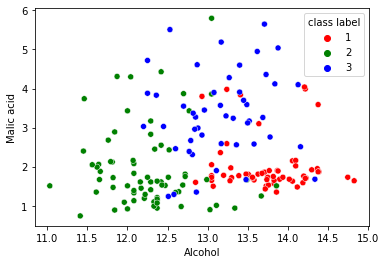

In [9]:
# scatter plot 
color_dict = {1:'red', 2:'green', 3:'blue'}
sns.scatterplot(x = df['Alcohol'],y =df['Malic acid'],hue = df['class label'],palette = color_dict )

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('class label', axis =1),
                                                 df['class label'],test_size = 0.3,random_state =0)

x_train.shape ,x_test.shape

((124, 2), (54, 2))

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [26]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)


In [27]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [28]:
np.round(x_test_scaled.describe(),1)

,Alcohol,Malic acid
count,54.0,54.0
mean,0.5,0.3
std,0.2,0.2
min,0.1,-0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


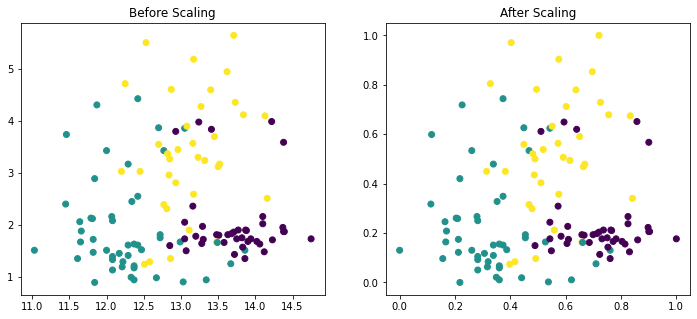

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Alcohol'], x_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

In [37]:
'''
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)
plt.show()
'''

"\nfig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))\n\n# before scaling\nax1.set_title('Before Scaling')\nsns.kdeplot(x_train['Alcohol'], ax=ax1)\nsns.kdeplot(x_train['Malic acid'], ax=ax1)\n\n# after scaling\nax2.set_title('After Standard Scaling')\nsns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)\nsns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)\nplt.show()\n"